# 8.1. Deep Convolutional Neural Networks (AlexNet)


Although some neural network accelerators were available in the 1990s, they were not yet sufficiently powerful to make deep multichannel, multilayer CNNs with a large number of parameters. For instance, NVIDIA’s GeForce 256 from 1999 was able to process at most 480 million floating-point operations, such as additions and multiplications, per second (MFLOPS), without any meaningful programming framework for operations beyond games. Today’s accelerators are able to perform in excess of 1000 TFLOPs per device.

The dirty truth of image recognition, they would tell you, is that features, geometry (Hartley and Zisserman, 2000, Hartley and Kahl, 2009), and engineering, rather than novel learning algorithms, drove progress. Computer vision researchers justifiably believed that a slightly bigger or cleaner dataset or a slightly improved feature-extraction pipeline mattered far more to the final accuracy than any learning algorithm.

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

## 8.1.1. Representation Learning

They believed that features themselves ought to be learned. Moreover, they believed that to be reasonably complex, the features ought to be hierarchically composed with multiple jointly learned layers, each with learnable parameters. In the case of an image, the lowest layers might come to detect edges, colors, and textures, by analogy with how the visual system in animals processes its input.

The first modern CNN (Krizhevsky et al., 2012), named AlexNet after one of its inventors, Alex Krizhevsky, is largely an evolutionary improvement over LeNet. It achieved excellent performance in the 2012 ImageNet challenge.

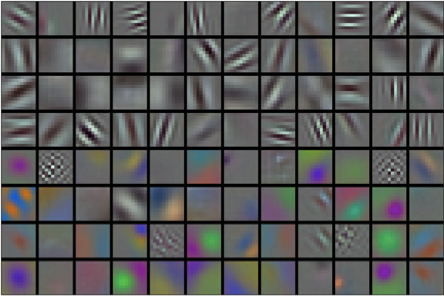

## 8.1.2. AlexNet

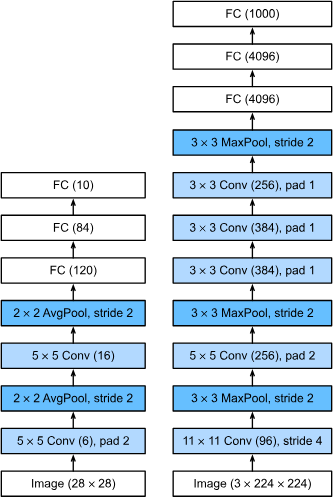

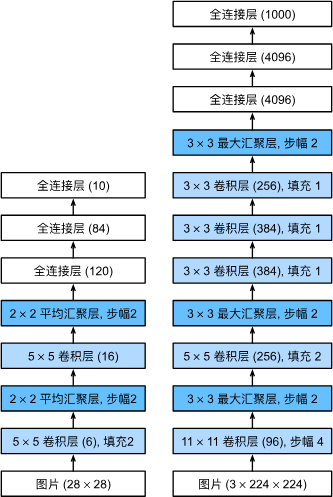

There are also significant differences between AlexNet and LeNet. 

First, AlexNet is much deeper than the comparatively small LeNet-5. 

AlexNet consists of eight layers: five convolutional layers, two fully connected hidden layers, and one fully connected output layer. 

Second, AlexNet used the ReLU instead of the sigmoid as its activation function. Let’s delve into the details below.

### 8.1.2.1. Architecture

Since the images in ImageNet are eight times taller and wider than the MNIST images, objects in ImageNet data tend to occupy more pixels with more visual detail.

In addition, after the first, second, and fifth convolutional layers, the network adds max-pooling layers with a window shape of 
 and a stride of 2. Moreover, AlexNet has ten times more convolution channels than LeNet.

After the final convolutional layer, there are two huge fully connected layers with 4096 outputs. These layers require nearly 1GB model parameters. Because of the limited memory in early GPUs, the original AlexNet used a dual data stream design, so that each of their two GPUs could be responsible for storing and computing only its half of the model. 
早起的GPU资源不足的情况下，一个模型需要分给两个GPU去计算，训练完成之后再将数据进行合并。

### 8.1.2.2. Activation Functions

激活函数换成了ReLU，主要有几个原因：
